# Damie Brooks Tiger Graph 4 All Challenge

This workbook will connect to the Tiger Graph Cloud database.
Following the calls, we will connect to the database and query for the best suggested Post, Subreddit, or Author that might foster critical thinking.
Most calls begin with assuming the end user is looking at a given post, and we may look up based on that Post or the User who wrote it.
For simplicity sake, we have selected 3 top most controversial posts listed on Reddit in the last month. 

This example utilizes Similarity algorithms and Natural Language Processing to add semantic meeting and look for perspectives that may be different.
This model can be applied to any User Generated Content such as social media posts on Twitter or reviews on a product website.

# 1) Initialization

__To get started, we will authenticate into the TigerGraph solution__

In [6]:
#authentication with a token is required to call installed and interpreted queries
import pyTigerGraph as tg 
import cfg
server = 'https://dbrooks.i.tgcloud.io'
graphname = 'RedditTest'

cfg.token = tg.TigerGraphConnection(host=server, graphname=graphname).getToken(cfg.secret, setToken=True, lifetime=None)[0]
conn = tg.TigerGraphConnection(host=server, graphname=graphname, password=cfg.password, apiToken=cfg.token)


__Let's understand the schema__

In [ ]:
#this returns the name of the vertex types
conn.getVertexTypes()

In [3]:
#tells us more about the attributes within the vertex Post
conn.getVertexType('Post')

{'Config': {'TAGGABLE': False,
  'STATS': 'OUTDEGREE_BY_EDGETYPE',
  'PRIMARY_ID_AS_ATTRIBUTE': True},
 'Attributes': [{'AttributeType': {'Name': 'STRING'},
   'IsPartOfCompositeKey': False,
   'PrimaryIdAsAttribute': False,
   'AttributeName': 'url',
   'HasIndex': False,
   'internalAttribute': False,
   'IsPrimaryKey': False},
  {'AttributeType': {'Name': 'STRING'},
   'IsPartOfCompositeKey': False,
   'PrimaryIdAsAttribute': False,
   'AttributeName': 'bodymood',
   'HasIndex': False,
   'internalAttribute': False,
   'IsPrimaryKey': False},
  {'AttributeType': {'Name': 'STRING'},
   'IsPartOfCompositeKey': False,
   'PrimaryIdAsAttribute': False,
   'AttributeName': 'body',
   'HasIndex': False,
   'internalAttribute': False,
   'IsPrimaryKey': False},
  {'AttributeType': {'Name': 'STRING'},
   'IsPartOfCompositeKey': False,
   'PrimaryIdAsAttribute': False,
   'AttributeName': 'headline',
   'HasIndex': False,
   'internalAttribute': False,
   'IsPrimaryKey': False}],
 'PrimaryId

# 2) Get available listing_ids

_Recommendation Queries in section 3) ask for a given listing id. You can retrieve sample listing ids to use in these following queries._

__Top Listing_ids for like War subreddit__

In [21]:
import pandas as pd
topwarlistings = conn.runInstalledQuery("TopListingIDsInSubWar")
newresult3 = topwarlistings[0]['ListingIDs']
newresult3
mydataframe = pd.DataFrame(newresult3)
myDict = {}
#iterate through and populate the attributes stored from the installed query
for i in mydataframe.index: 
    myDict[mydataframe['v_id'][i]] = {
        'listingid': mydataframe['v_id'][i],
    }   
#topwarlistings
df = pd.DataFrame.from_dict(myDict, orient='index')
df

,listingid
CenterofDonetskhitbytochkaUrocket_UkraineWarVideoReport,CenterofDonetskhitbytochkaUrocket_UkraineWarVi...
ElonMuskchallengesPutintoafightoverUkraine_UkraineWarVideoReport,ElonMuskchallengesPutintoafightoverUkraine_Ukr...
FrenchactivistPierreAvnerbrokeintothevillaofPutinsdaughterAltaMiraintheFrenchcityofBiarritzchangedthelocksandannouncedthatthevillawasreadytoacceptUkrainianrefugees_UkraineWarVideoReport,FrenchactivistPierreAvnerbrokeintothevillaofPu...
LooterinKharkiv_UkraineWarVideoReport,LooterinKharkiv_UkraineWarVideoReport
OrkshavenipplesTheonlyactivefunctionnippleshaveislactationIforkshavedevelopednipplesitmustbeforproducingmilkUnderatleastsomecircumstancesitmustbepossibletomilkanorkDiscuss_Warhammer40k,OrkshavenipplesTheonlyactivefunctionnippleshav...
PleaseStopBringingBackDeadCharacters_StarWars,PleaseStopBringingBackDeadCharacters_StarWars
Su25wasabletoreachthebaseafterbeinghitbyaMANPADSmissile_UkraineWarVideoReport,Su25wasabletoreachthebaseafterbeinghitbyaMANPA...
TheBookofBobaFettwasfineAndthatsokay_StarWars,TheBookofBobaFettwasfineAndthatsokay_StarWars
ThereactionofaverageRussianyoungpeopletothemeresightofaUkrainianwsubsfromrRussiaUkraineWar2022_UkraineWarVideoReport,ThereactionofaverageRussianyoungpeopletothemer...
YoudontmissVerdansk_CODWarzone,YoudontmissVerdansk_CODWarzone


__Top Listing_ids for like "Crypto" subreddit__

In [23]:
topcryptolistings = conn.runInstalledQuery("TopListingIDsInSubCrypto")
topcryptolistings

[{'ListingIDs': [{'v_id': 'EveryonewasfordecentralisationuntilRussiawantedtosellGasforbitcoinnowpeoplearoundthissubarecryingaboutitwithcommentslikeIwouldratherlosemoneyandthepricetanksthanRussiamakingmoneyfromBitcoin_CryptoCurrency',
    'v_type': 'Post',
    'attributes': {'listingid': 'EveryonewasfordecentralisationuntilRussiawantedtosellGasforbitcoinnowpeoplearoundthissubarecryingaboutitwithcommentslikeIwouldratherlosemoneyandthepricetanksthanRussiamakingmoneyfromBitcoin_CryptoCurrency',
     'url': '/r/CryptoCurrency/comments/tniwhf/everyone_was_for_decentralisation_until_russia/',
     'bodymood': 'Negative',
     'body': 'First of all  as someone from a third world country that s been sanctioned  all sanctions do is bring a famine to a country   Looking at Syria  Venezuela  etc  All those thinking they sit on a moral high ground calling for the hunger of millions of people are disgusting double standard subhumans that have no empathy for their fellow human  I ve seen people dying

__Top Listing_ids for Antiwork subreddit__

In [24]:
topantiworklistings = conn.runInstalledQuery("TopListingIDsInSubAntiwork")
topantiworklistings

[{'ListingIDs': [{'v_id': 'Reminderifyoureantiwokeyoureantiworker_antiwork',
    'v_type': 'Post',
    'attributes': {'listingid': 'Reminderifyoureantiwokeyoureantiworker_antiwork',
     'url': '/r/antiwork/comments/tp02kt/reminder_if_youre_antiwoke_youre_antiworker/',
     'bodymood': 'Positive',
     'body': 'Trans rights are workers  rights Women s rights are workers  rights BIPOC rights are workers  rights Social justice is justice for workers ',
     'headline': 'Reminder  if you re  anti woke  you re anti worker ',
     '@engScore': 3884}},
   {'v_id': 'WomenshouldbegivenPTOforheavyperiodsDoyouagree_antiwork',
    'v_type': 'Post',
    'attributes': {'listingid': 'WomenshouldbegivenPTOforheavyperiodsDoyouagree_antiwork',
     'url': '/r/antiwork/comments/tk8lzi/women_should_be_given_pto_for_heavy_periods_do/',
     'bodymood': 'Negative',
     'body': 'I feel like  women  people with a uterus should be given PTO for heavy and or especially painful periods  It s so painful sometim

# 3) Recommendation Queries

__Let's begin querying the database__

In [3]:
##given a specific post by listingid, this query looks for top engaging posts similar to that post but polarizing to the reddit community
import pandas as pd
controversialperspective = conn.runInstalledQuery("Q1controversial", {"p":"IdgafImleavingmycoinsonanexchangewhereitisinsuredToomanyscamsouttherethatevencryptovetsarefallingfor_CryptoCurrency"})
controversialperspective[0]
newresult3 = controversialperspective[0]['TopPolarizing']
polsDataframe = pd.DataFrame(newresult3)
myDict = {}
#iterate through and populate the attributes stored from the installed query
for i in polsDataframe.index: 
    myDict[polsDataframe['v_id'][i]] = {
        'listingid': polsDataframe['v_id'][i],
        #'attributes': polsDataframe['attributes'][i],
        'url': polsDataframe['attributes'][i]['url'],
        'headline': polsDataframe['attributes'][i]['headline']
    }   
#we can use this set of results to display in our app for alternative views
df = pd.DataFrame.from_dict(myDict, orient='index')
df

,listingid,url,headline
EveryonewasfordecentralisationuntilRussiawantedtosellGasforbitcoinnowpeoplearoundthissubarecryingaboutitwithcommentslikeIwouldratherlosemoneyandthepricetanksthanRussiamakingmoneyfromBitcoin_CryptoCurrency,EveryonewasfordecentralisationuntilRussiawante...,/r/CryptoCurrency/comments/tniwhf/everyone_was...,Everyone was for decentralisation until Russia...
IunderestimatedCryptoReddit_CryptoCurrency,IunderestimatedCryptoReddit_CryptoCurrency,/r/CryptoCurrency/comments/sw0y2d/i_underestim...,I underestimated Crypto Reddit
CardanoFUDnolongerhasanyteeth_CryptoCurrency,CardanoFUDnolongerhasanyteeth_CryptoCurrency,/r/CryptoCurrency/comments/tmqduc/cardano_fud_...,Cardano FUD no longer has any teeth
AbandonyourshitcoinsatthenextBTCATH_CryptoCurrency,AbandonyourshitcoinsatthenextBTCATH_CryptoCurr...,/r/CryptoCurrency/comments/trtmxz/abandon_your...,Abandon your shitcoins at the next BTC ATH
TheworldshouldcutRussiaofffromSWIFTandcryptobycuttinginternetaccessCantturntocryptoiftheycantaccesstheinternet_CryptoCurrency,TheworldshouldcutRussiaofffromSWIFTandcryptoby...,/r/CryptoCurrency/comments/t049ia/the_world_sh...,The world should cut Russia off from SWIFT and...


In [4]:
##given a specific post by listingid, this query looks for similar posts that are considered new 
import pandas as pd
simNewPosts = conn.runInstalledQuery("Q2new", {"p":"IdgafImleavingmycoinsonanexchangewhereitisinsuredToomanyscamsouttherethatevencryptovetsarefallingfor_CryptoCurrency"})
#differentFeeling[0]
#differentFeeling
newresult2 = simNewPosts[0]['TopEngagingNew']
simsDataframe = pd.DataFrame(newresult2)
myDict = {}
#iterate through and populate the attributes stored from the installed query
for i in simsDataframe.index: 
    myDict[simsDataframe['v_id'][i]] = {
        'listingid': simsDataframe['v_id'][i],
        'attributes': simsDataframe['attributes'][i]
    }
df = pd.DataFrame.from_dict(myDict, orient='index')
df

,listingid,attributes
DailyDiscussionMarch212022GMT0_CryptoCurrency,DailyDiscussionMarch212022GMT0_CryptoCurrency,{'listingid': 'DailyDiscussionMarch212022GMT0_...
MyfirstdipincryptoAnytipsandtricksIshouldlookoutfor_CryptoCurrency,MyfirstdipincryptoAnytipsandtricksIshouldlooko...,{'listingid': 'MyfirstdipincryptoAnytipsandtri...
Howcryptoandblockchainprojectsaredrivingforwardaneweraoftech_CryptoCurrency,Howcryptoandblockchainprojectsaredrivingforwar...,{'listingid': 'Howcryptoandblockchainprojectsa...
NighmtarewithKraken_CryptoCurrency,NighmtarewithKraken_CryptoCurrency,{'listingid': 'NighmtarewithKraken_CryptoCurre...
CannewinnovativecoinsonlytrulygrowduringabullrunAndifsoisthecurrentcryptoclimatesustainable_CryptoCurrency,Cannewinnovativecoinsonlytrulygrowduringabullr...,{'listingid': 'Cannewinnovativecoinsonlytrulyg...


In [5]:
##given a specific post by listingid, this query looks for top engaging posts similar to that post but have a different feeling (gauged by sentiment)
differentFeeling = conn.runInstalledQuery("Q3sentiment", {"p":"IdgafImleavingmycoinsonanexchangewhereitisinsuredToomanyscamsouttherethatevencryptovetsarefallingfor_CryptoCurrency"})
#differentFeeling[0]
#differentFeeling
newresult2 = differentFeeling[0]['SimsPosts']
simsDataframe = pd.DataFrame(newresult2)
myDict = {}
#iterate through and populate the attributes stored from the installed query
for i in simsDataframe.index: 
    myDict[simsDataframe['v_id'][i]] = {
        'listingid': simsDataframe['v_id'][i],
        'attributes': simsDataframe['attributes'][i],
        'url': simsDataframe['attributes'][i]['url'],
        'headline': simsDataframe['attributes'][i]['headline'],
        'numcomments': simsDataframe['attributes'][i]['@engagementscore'],
        'sentiment': simsDataframe['attributes'][i]['@moodtype']
    }   
#we can use this set of results to display in our app for alternative views
df = pd.DataFrame.from_dict(myDict, orient='index')
df

,listingid,attributes,url,headline,numcomments,sentiment
NanoisinfacttoogoodtobetruePleasedonttellyourlovedonestobuyitBlaringsecurityflawsandotherissuesinsidethisthread_CryptoCurrency,NanoisinfacttoogoodtobetruePleasedonttellyourl...,{'listingid': 'NanoisinfacttoogoodtobetruePlea...,/r/CryptoCurrency/comments/tpdyv8/nano_is_in_f...,Nano is in fact too good to be true Please ...,315,Positive
Whyisnoonetalkingaboutthat1DEXthatturnedoffitssmartcontractsforover48hoursforunexpectedmaintenanceandunilaterallymigrateditsusersfundstoanewsmartcontractNoneofthatshouldbepossibleonadecentralizedapp_CryptoCurrency,Whyisnoonetalkingaboutthat1DEXthatturnedoffits...,{'listingid': 'Whyisnoonetalkingaboutthat1DEXt...,/r/CryptoCurrency/comments/tmzn47/why_is_no_on...,Why is no one talking about that 1 DEX that...,315,Positive
ShibaInujustannouncedcreationofitsownmetaverse_CryptoCurrency,ShibaInujustannouncedcreationofitsownmetaverse...,{'listingid': 'ShibaInujustannouncedcreationof...,/r/CryptoCurrency/comments/tsjis3/shiba_inu_ju...,Shiba Inu just announced creation of its own m...,211,Positive
SayingBitcoinwontdoa100xisntFUDitsjustbeingrealistic_CryptoCurrency,SayingBitcoinwontdoa100xisntFUDitsjustbeingrea...,{'listingid': 'SayingBitcoinwontdoa100xisntFUD...,/r/CryptoCurrency/comments/t92nmp/saying_bitco...,Saying Bitcoin won t do a 100x isnt FUD it ...,194,Positive
AlexBornyakovUkrainesdeputyministerofdigitaltransformationthenationalbankisnotfullyoperatingcryptoishelpingtoperformfasttransferstomakeitveryquickandgetresultsalmostimmediatelyCryptosroleisessentialinthisconflictintermsofhelpingourarmy_CryptoCurrency,AlexBornyakovUkrainesdeputyministerofdigitaltr...,{'listingid': 'AlexBornyakovUkrainesdeputymini...,/r/CryptoCurrency/comments/tedkmi/alex_bornyak...,Alex Bornyakov Ukraine s deputy minister of d...,144,Positive


# 4) Analysis and Visuazlations

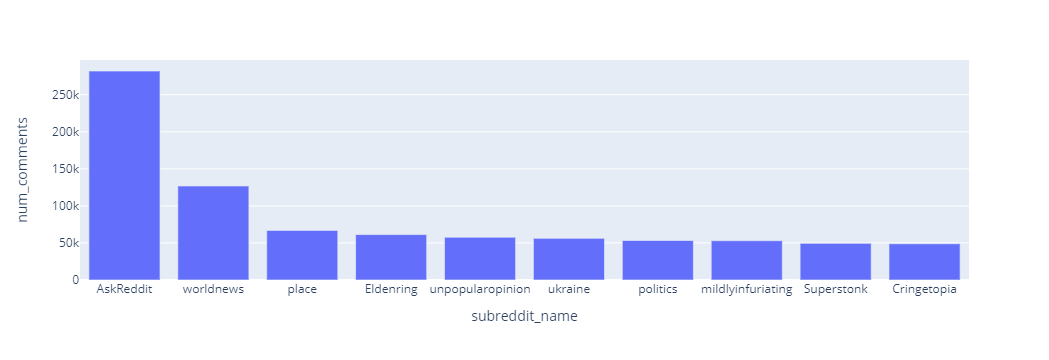

In [6]:
#this query looks for the subreddits that have the most comments in them
import pandas as pd
import plotly.express as px
topsubs = conn.runInstalledQuery("MostEngagingSubreddits")
newresult3 = topsubs[0]['TopSubreddits']
subsDataframe = pd.DataFrame(newresult3)
myDict = {}
for i in subsDataframe.index: 
    myDict[subsDataframe['v_id'][i]] = {
        'subreddit_name': subsDataframe['v_id'][i],
        'num_comments': subsDataframe['attributes'][i]['@comments']
    }
dfsubreddits = pd.DataFrame.from_dict(myDict, orient='index')

fig = px.bar(dfsubreddits, x='subreddit_name', y='num_comments')
fig.show()

In [19]:
##this query looks for the users who have posted the most in all of the subreddits
import pandas as pd
import plotly.express as px

prolificAuthors = conn.runInstalledQuery("AuthorMostPosts")
newresult = prolificAuthors[0]['Author']
authorDataframe = pd.DataFrame(newresult)
myDict = {}
#iterate through and populate the attributes stored from the installed query
for i in authorDataframe.index: 
    myDict[authorDataframe['v_id'][i]] = {
        'authorname': authorDataframe['v_id'][i],
        'numposts': authorDataframe['attributes'][i]['@pubNum'],
    }  
dfauthors = pd.DataFrame.from_dict(myDict, orient='index')
dfauthors   
#fig = px.bar(dfsubreddits, x='authorname', y='numposts')
#fig.show()

,authorname,numposts
AutoNewspaperAdmin,AutoNewspaperAdmin,100
ShortAlgo,ShortAlgo,79
AutoModerator,AutoModerator,64
RLCD-Bot,RLCD-Bot,60
crytoloover,crytoloover,52
No_Opening_6901,No_Opening_6901,50
Deal-Haggler,Deal-Haggler,42
#NAME?,#NAME?,38
-en-,-en-,38
PhantomTutors,PhantomTutors,36
